<a href="https://colab.research.google.com/github/Shibli-Nomani/project-02-Global-Laptop-selling-diff-ML-Regression/blob/main/project_02_global_laptop_selling_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/Regression Model For Multi ML/global_laptop_selling_data.csv'

In [82]:
df=pd.read_csv(path, encoding='latin-1')
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Check Unique Values**

In [83]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


**Check Missing Values**

In [85]:
#Handling Missing Value

missing_value=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percent],axis=1,keys=['missing','percent'])
missing_data.head(40)

,missing,percent
laptop_ID,0,0.0
Company,0,0.0
Product,0,0.0
TypeName,0,0.0
Inches,0,0.0
ScreenResolution,0,0.0
Cpu,0,0.0
Ram,0,0.0
Memory,0,0.0
Gpu,0,0.0


**Drop Unnecessary features**

In [86]:
df = df.drop('laptop_ID', axis=1)

In [45]:
df.shape

(1303, 12)

In [87]:
df.drop_duplicates(inplace=True)
df.shape


(1275, 12)

In [88]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [89]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)


In [90]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


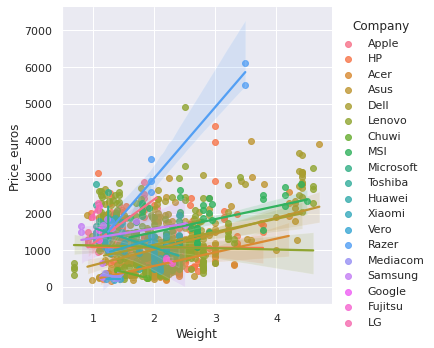

In [95]:
sns.lmplot(x="Weight", y="Price_euros", hue='Company', data=df)

In [15]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [16]:
df_product_price

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [17]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

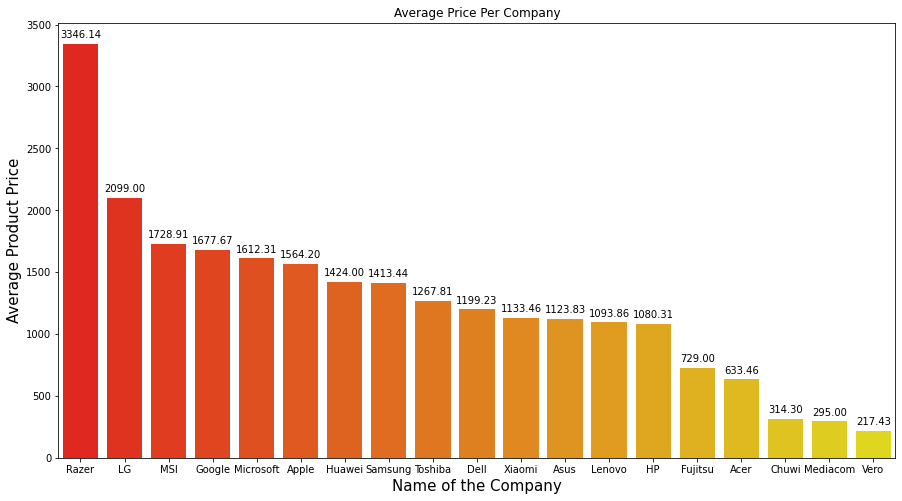

In [18]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [ ]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              171
Price_euros         791
dtype: int64

**LabelEncoding for Categorical Values**

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

**Correlation Heatmap**

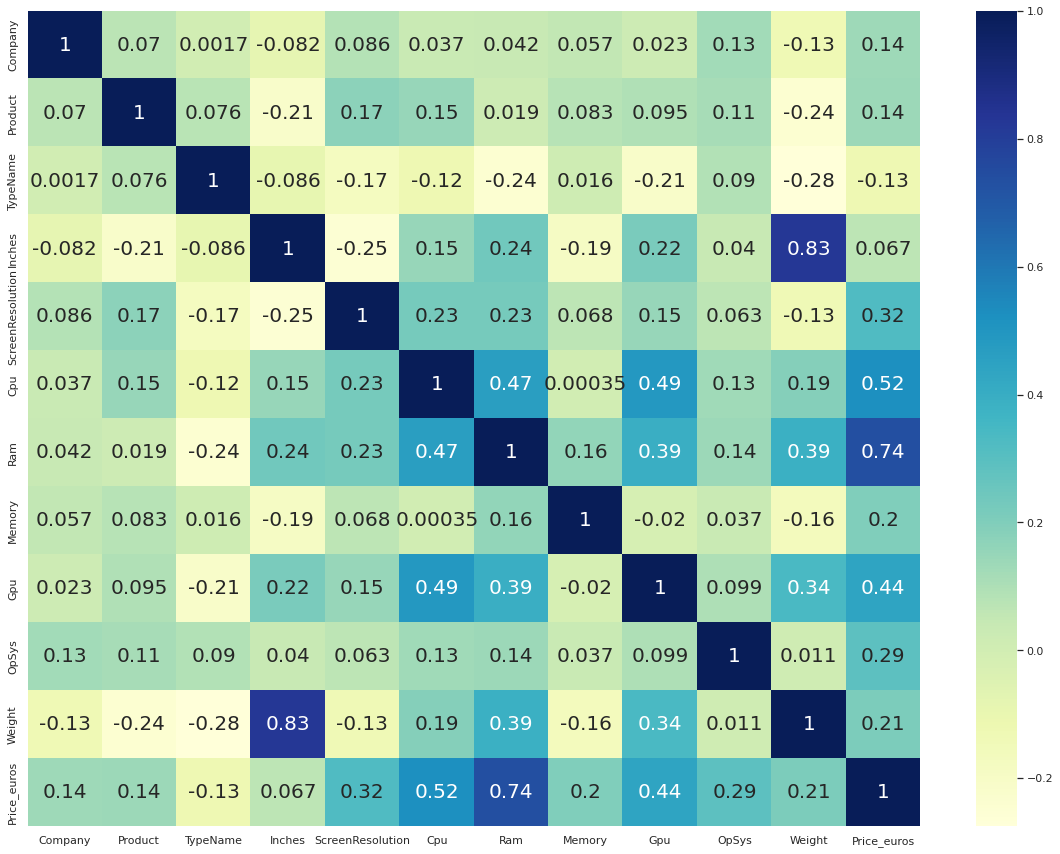

In [42]:
#correlation map
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size":20})
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale = 1)

In [52]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00


**Separate target and features**

In [53]:
#Target
y=df['Price_euros']
#Features
X=df.copy()
X=df.drop('Price_euros', axis=1)
print(y.shape)
print(X.shape)

(1275,)
(1275, 11)


**Features Scaling**

In [54]:
#Standard Scaler
x= X.columns
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X[x] = sc.fit_transform(X[x])
X.head(5)




,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,-1.333546,-0.042870,1.136135,-1.205746,1.737738,-0.495277,-0.086499,-1.549159,0.142843,3.081382,-1.002380
1,-1.333546,-0.037025,1.136135,-1.205746,-1.056229,-0.575388,-0.086499,-1.801288,-0.180319,3.081382,-1.047227
2,0.131784,-1.504040,0.334490,0.403873,-0.167240,-0.134776,-0.086499,-0.036386,-0.087987,-0.787414,-0.269871
3,-1.333546,-0.042870,1.136135,0.263906,1.991735,0.305837,1.483418,1.602452,-2.119287,3.081382,-0.314718
4,-1.333546,-0.042870,1.136135,-1.205746,1.737738,-0.415165,-0.086499,-0.036386,0.189009,3.081382,-1.002380


**Splitting Train and Test**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state =42)

**Linear Regression**

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
#value Coefficient or Slope
m= lr.coef_
print('cofficient/slope(m):', m)
#value y intercept
c= lr.intercept_
print('interceptor(c):',c)
#train accurecy
#Accuracy Check
print('train accuracy:', lr.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', lr.score(X_test , y_test))

cofficient/slope(m): [  44.25994003   25.59311594   56.02437058 -102.56659072   81.08094427
  114.93859979  387.92688259   54.49025552   83.17058239  109.07474782
   74.66627211]
interceptor(c): 1140.2754734095251
train accuracy: 0.6701154081767677
test accuracy: 0.6677019827718136


**Ridge**

In [57]:
from sklearn.linear_model import Ridge
rd=Ridge(random_state=42, solver='lsqr')
rd.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:', rd.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', rd.score(X_test , y_test))

train accuracy: 0.6701146253546173
test accuracy: 0.6675590926519943


**Lasso**

In [58]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:', ls.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', ls.score(X_test , y_test))

train accuracy: 0.6700712731307983
test accuracy: 0.6671601660714197


**ElasticNet**

In [59]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:', en.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', en.score(X_test , y_test))


train accuracy: 0.6289028367839231
test accuracy: 0.6046885709097292


**DecisionTreeRegressor**

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(random_state=42)
dtc.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',dtc.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', dtc.score(X_test , y_test))

train accuracy: 0.9996512079646255
test accuracy: 0.7560042761610357


**RandomForestRegressor**

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42, max_features='sqrt')
rf.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',rf.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', rf.score(X_test , y_test))

train accuracy: 0.9771456387167403
test accuracy: 0.8703799384985785


**ExtraTreesRegressor**

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(random_state=42)
etr.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:', etr.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', etr.score(X_test , y_test))

train accuracy: 0.9996512079646255
test accuracy: 0.8828542484447874


**K-Nearest Neighboring Regressor**

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3,  weights='distance')
knn.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',knn.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', knn.score(X_test , y_test))

train accuracy: 0.9996512079646255
test accuracy: 0.7809184980883545


**Support Vector Regressor**

In [64]:
from pandas.core.common import random_state
from sklearn.svm import SVR
svr=SVR(kernel='linear', C=9)
svr.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',svr.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', svr.score(X_test , y_test))

train accuracy: 0.651702295980974
test accuracy: 0.6504815680022842


**Linear Support Vector Regressor**

In [65]:
from sklearn.svm import LinearSVR
lsvr= LinearSVR(random_state=42, loss='squared_epsilon_insensitive', C=9)
lsvr.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',lsvr.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', lsvr.score(X_test , y_test))

train accuracy: 0.6690944322783585
test accuracy: 0.6700006757746415


**Stochastic Gradient Descent Regressor**

In [66]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(random_state=42, loss='squared_epsilon_insensitive', n_iter_no_change=500)
sgd.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:',sgd.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', sgd.score(X_test , y_test))

train accuracy: 0.670001743624479
test accuracy: 0.6684426827418479


**GaussianProcessRegressor**

In [67]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr=GaussianProcessRegressor(random_state=42, optimizer='callable')
gpr.fit(X_train, y_train)
#train accurecy
#Accuracy Check
print('train accuracy:', gpr.score(X_train , y_train))
#test accuracy
#Accuracy Check
print('test accuracy:', gpr.score(X_test , y_test))

train accuracy: 0.9996512079630464
test accuracy: -28.46319198752436


**Compare Different Regression ML models**

In [68]:
models=[
LinearRegression(),
Ridge(random_state=42, solver='lsqr'),
Lasso(),
ElasticNet(),
DecisionTreeRegressor(random_state=42),
RandomForestRegressor(random_state=42, max_features='sqrt'),
ExtraTreesRegressor(random_state=42),
KNeighborsRegressor(n_neighbors=3,  weights='distance'),
SVR(kernel='linear', C=9),
LinearSVR(random_state=42, loss='squared_epsilon_insensitive', C=9),
SGDRegressor(random_state=42, loss='squared_epsilon_insensitive', n_iter_no_change=500),
GaussianProcessRegressor(random_state=42, optimizer='callable'),
       ]

In [69]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, auc,roc_curve
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score  



In [78]:
names =['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTree', 'RandomForest', 'ExtraTree', 'KNN', 'SVR', 'LinearSVR', 'GradientBoost', 'GaussianProcess']  

models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for models_name, ml in zip(names, models): 
    
    ml.fit(X_train, y_train)
    y_pred=ml.fit(X_train, y_train).predict(X_test)
    #fp, tp, tn = roc_curve(y_test, y_pred)
    #models_name = ml.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(ml.score(X_train, y_train), 5)
    models_compare.loc[row_index, 'Test Accuracy'] = round(ml.score(X_test, y_test), 5)
    models_compare.loc[row_index, 'R2 Score'] = r2_score(y_test, y_pred)
    models_compare.loc[row_index, 'mean sqrr error']=round((np.square(np.subtract(y_test,y_pred)).mean()),2)
    models_compare.loc[row_index, 'root mean sqr error']=sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    models_compare.loc[row_index, 'mean abs error']=mean_absolute_error(y_test, y_pred)
    row_index+=1
    
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    

In [79]:
models_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True) 

models_compare

,Model Name,Train Accuracy,Test Accuracy,R2 Score,mean sqrr error,root mean sqr error,mean abs error
6,ExtraTree,0.99965,0.88285,0.882854,58144.04,241.130747,159.504886
5,RandomForest,0.97715,0.87038,0.870380,64335.53,253.644490,166.299746
7,KNN,0.99965,0.78092,0.780918,108738.75,329.755597,206.825465
4,DecisionTree,0.99965,0.75600,0.756004,121104.66,348.000949,225.215588
9,LinearSVR,0.66909,0.67000,0.670001,163791.63,404.711780,286.263584
10,GradientBoost,0.67000,0.66844,0.668443,164564.92,405.666018,287.515924
0,Linear Regression,0.67012,0.66770,0.667702,164932.56,406.118895,287.117190
1,Ridge,0.67011,0.66756,0.667559,165003.48,406.206202,287.184724
2,Lasso,0.67007,0.66716,0.667160,165201.48,406.449852,287.531378
8,SVR,0.65170,0.65048,0.650482,173479.73,416.508974,285.047403
